In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook

In [3]:
import numpy as np
from readts import TSFile
import matplotlib.pyplot as plt

In [111]:
cuvac = TSFile('CuVac', 'cuvac-neb')

cuvac = TSFile('HVac', '../../tests/cuvac-neb-lj/')

In [112]:
cuvac_tst = cuvac.blocks['TST']

cuvac_i = cuvac.blocks['REA'][1][0]
cuvac_f = cuvac.blocks['PRO'][1][0]
cuvac_tst[cuvac_tst.last_index]

[TSBlock(step=46, rcoord=0.0751397503, atoms=Atoms(symbols='H31', pbc=True, cell=[7.253359, 7.253359, 7.253359], calculator=SinglePointCalculator(...))),
 TSBlock(step=46, rcoord=0.199630652, atoms=Atoms(symbols='H31', pbc=True, cell=[7.253359, 7.253359, 7.253359], calculator=SinglePointCalculator(...))),
 TSBlock(step=46, rcoord=0.277324317, atoms=Atoms(symbols='H31', pbc=True, cell=[7.253359, 7.253359, 7.253359], calculator=SinglePointCalculator(...))),
 TSBlock(step=46, rcoord=0.340106886, atoms=Atoms(symbols='H31', pbc=True, cell=[7.253359, 7.253359, 7.253359], calculator=SinglePointCalculator(...))),
 TSBlock(step=46, rcoord=0.398606723, atoms=Atoms(symbols='H31', pbc=True, cell=[7.253359, 7.253359, 7.253359], calculator=SinglePointCalculator(...))),
 TSBlock(step=46, rcoord=0.455933178, atoms=Atoms(symbols='H31', pbc=True, cell=[7.253359, 7.253359, 7.253359], calculator=SinglePointCalculator(...))),
 TSBlock(step=46, rcoord=0.553636554, atoms=Atoms(symbols='H31', pbc=True, cell=[

<IPython.core.display.Javascript object>


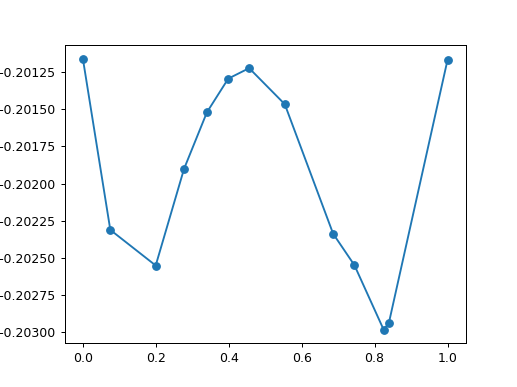

In [113]:
# Energy?
E_tst = cuvac_tst.get_energies(cuvac_tst.last_index)
E = np.zeros(len(E_tst)+2)
E[1:-1] = E_tst
E[0] = cuvac_i.atoms.get_potential_energy()
E[-1] = cuvac_f.atoms.get_potential_energy()

# Coordinates?
rcoords = np.zeros(len(E))
rcoords[1:-1] = cuvac_tst.get_rcoords(cuvac_tst.last_index)
rcoords[-1] = 1

fig, ax = plt.subplots()

ax.plot(rcoords, E, 'o-')

In [114]:
import os

# Save each final structure as its own file
for i, tsb in enumerate(cuvac_tst[cuvac_tst.last_index]):
    a = tsb.atoms
    a.write(os.path.join('./cuvac-castep-traj/cuvac-castep-{0}.cell'.format(i+1)))

In [115]:
traj_tst = cuvac_tst.get_positions(cuvac_tst.last_index)
traj = np.zeros(np.array(traj_tst.shape)+[2,0,0])
traj[1:-1] = traj_tst
traj[0] = cuvac_i.atoms.positions
traj[-1] = cuvac_f.atoms.positions

In [116]:
traj.shape

(13, 31, 3)

In [117]:
cell

array([[7.253359, 0.      , 0.      ],
       [0.      , 7.253359, 0.      ],
       [0.      , 0.      , 7.253359]])

In [118]:
max(E)-min(E)

0.0018224800000000152

In [119]:
np.argmax(np.linalg.norm(traj[-1,:,:]-traj[0,:,:], axis=1))

16

<IPython.core.display.Javascript object>


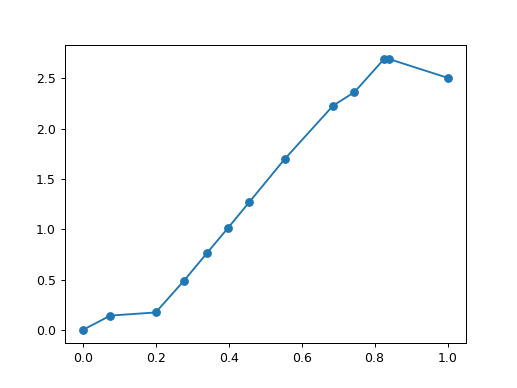

In [120]:
fig, ax = plt.subplots()

ax.plot(rcoords, np.linalg.norm(traj[:,7,:]-traj[0,7,:], axis=1), 'o-')

In [105]:
rcoord = np.cumsum(np.linalg.norm(np.diff(traj, axis=0), axis=(1,2)))
rcoord /= rcoord[-1]

rcoord

array([0.01345423, 0.03261285, 0.04396608, 0.05374807, 0.063187  ,
       0.07295048, 0.08252629, 0.0919476 , 0.10117894, 0.11107861,
       0.12688692, 1.        ])

In [106]:
rcoords

array([0.        , 0.01345423, 0.03261285, 0.04396608, 0.05374807,
       0.063187  , 0.07295048, 0.08252629, 0.0919476 , 0.10117894,
       0.11107861, 0.12688692, 1.        ])

In [107]:
np.linalg.norm(np.diff(traj, axis=0), axis=(2))[-1]

array([4.68091156e-02, 7.12953018e+00, 7.12954091e+00, 7.25294448e+00,
       1.89607151e-01, 7.12958693e+00, 1.76945228e-01, 9.12956728e-02,
       7.21184278e+00, 7.21791721e+00, 1.72678551e-01, 3.75116112e-03,
       7.13466819e+00, 7.21789149e+00, 1.72896793e-01, 9.86105404e-03,
       7.25326921e+00, 1.72808722e-01, 4.84367665e-02, 7.25289161e+00,
       1.70830908e-01, 1.72899638e-01, 4.87062878e-02, 9.88150256e-03,
       3.64045222e-02, 3.52370833e-02, 3.52292376e-02, 5.93615908e-03,
       3.55353709e-02, 3.54580057e-02, 3.84173588e-02])

In [108]:
np.diff(traj, axis=0)[-1][12]

array([-7.13362707e+00, -1.21880910e-01,  2.24942649e-04])

In [109]:
traj[-1]-traj[0]

array([[ 6.01600003e-03,  5.99000002e-03, -1.00000000e-06],
       [-7.23235000e+00, -6.27999996e-03,  1.48240000e-02],
       [-6.27399909e-03, -7.23233598e+00,  1.47899950e-02],
       [-6.24600033e-03, -6.25799678e-03,  7.25300401e+00],
       [ 2.09850000e-02,  2.10210000e-02,  3.22999186e-04],
       [-7.23235202e+00, -6.27999996e-03, -1.51839992e-02],
       [-6.27199880e-03,  2.10170000e-02, -1.51479622e-02],
       [ 1.77147900e+00,  1.77147700e+00,  3.17998461e-04],
       [-7.24735000e+00, -5.67300195e-03,  1.00000000e-06],
       [-7.24738498e+00,  5.92196925e-03, -2.10003976e-04],
       [-2.14869972e-02, -2.07030000e-02, -4.79000628e-04],
       [-6.23799917e-03,  5.89699208e-03, -7.00000001e-06],
       [-7.23237800e+00, -2.07070006e-02,  3.19998751e-04],
       [-7.24738101e+00,  5.92196925e-03, -1.52985132e-04],
       [-2.14869972e-02, -2.06969991e-02,  1.24039138e-04],
       [-2.15139958e-02,  2.11620083e-02,  3.23999331e-04],
       [-5.69099927e-03,  5.98200002e-03